In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel("StateCodeReduced.xlsx")

In [4]:
data.head()

,mw,code,temp,moisture,mvar,unit_no,mw_declare
0,350,SO,40,20.0,25,1,387
1,361,SO,51,16.0,33,1,387
2,373,LF1,34,20.0,51,3,387
3,377,LF1,47,17.0,51,3,403
4,375,SO,49,22.0,54,3,403


In [5]:
data['code'].value_counts()

SO     1285
LF1     633
LA       20
LP       15
PO       11
FA       11
FP        6
LD        1
Name: code, dtype: int64

In [6]:
data.isnull().sum()

mw            0
code          0
temp          0
moisture      0
mvar          0
unit_no       0
mw_declare    0
dtype: int64

In [7]:
data.corr()

,mw,temp,moisture,mvar,unit_no,mw_declare
mw,1.000000,0.181605,-0.108631,0.442904,0.479979,-0.199083
temp,0.181605,1.000000,-0.797736,0.279669,0.003285,0.076215
moisture,-0.108631,-0.797736,1.000000,-0.156405,-0.008763,-0.010247
mvar,0.442904,0.279669,-0.156405,1.000000,0.317014,0.033762
unit_no,0.479979,0.003285,-0.008763,0.317014,1.000000,-0.336532
mw_declare,-0.199083,0.076215,-0.010247,0.033762,-0.336532,1.000000


In [8]:
X = data[["mw","temp","moisture","mvar","mw_declare","unit_no"]]
y = data["code"]
y

0        SO
1        SO
2       LF1
3       LF1
4        SO
       ... 
1977    LF1
1978    LF1
1979     SO
1980     SO
1981     SO
Name: code, Length: 1982, dtype: object

In [9]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,mw,temp,moisture,mvar,mw_declare,unit_no
0,-0.988142,-0.097790,-0.858841,-0.648323,-0.002739,-1.537021
1,-0.476141,1.546014,-1.237092,0.045087,-0.002739,-1.537021
2,0.082406,-0.994410,-0.858841,1.605262,-0.002739,-0.766567
3,0.268588,0.948267,-1.142529,1.605262,1.096813,-0.766567
4,0.175497,1.247140,-0.669716,1.865291,1.096813,-0.766567
...,...,...,...,...,...,...
1977,0.501316,-0.097790,0.370474,0.651822,-0.002739,1.159569
1978,0.873680,0.798830,-0.669716,1.431909,-0.002739,1.544796
1979,0.780589,0.948267,-0.953404,1.605262,-0.002739,1.544796
1980,0.547861,1.396577,-0.953404,1.605262,-0.002739,1.544796


Text(0.5, 1.0, 'Success ')

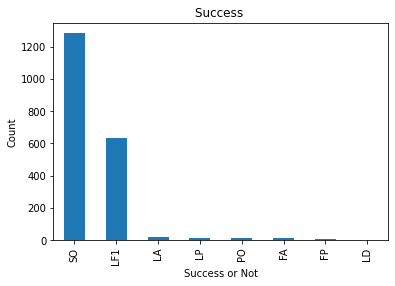

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
data.code.value_counts().plot(kind='bar')
plt.xlabel("Success or Not")
plt.ylabel("Count")
plt.title("Success ")

<AxesSubplot:xlabel='code', ylabel='count'>

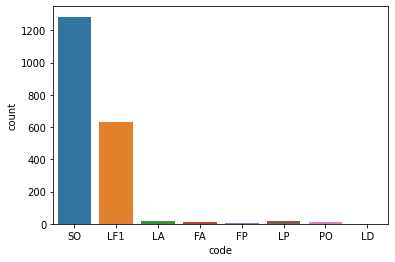

In [11]:
sns.countplot(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
#Setup a knn classifier with k neighbors
Model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [14]:
#Fit the model
Model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
Model.score(X_test,y_test) # Accuracy of the model

0.8050420168067227

In [16]:
Model.score(X_train,y_train) # Accuracy of the model

1.0

In [17]:
y_pred=Model.predict(X_test)

<AxesSubplot:>

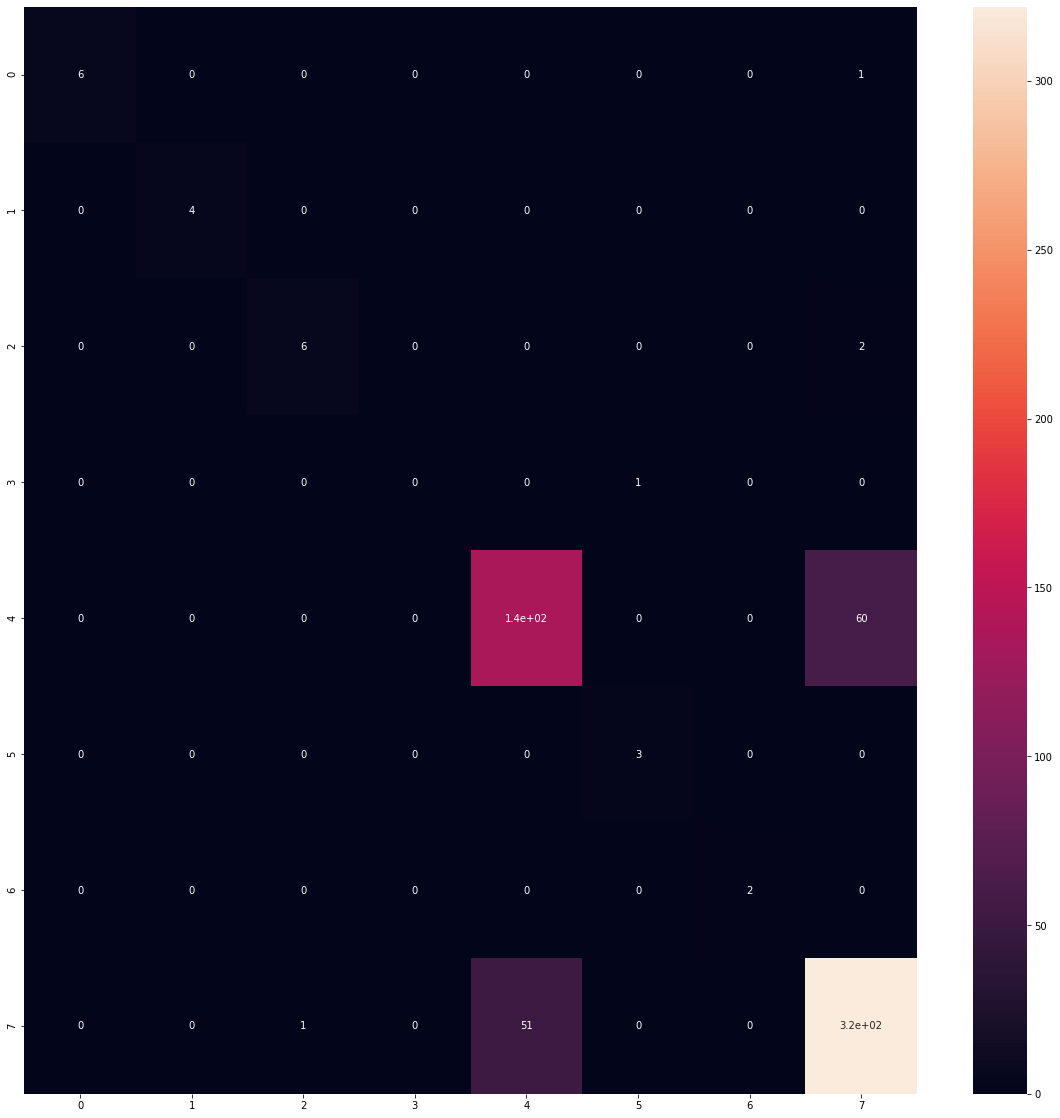

In [18]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True)

In [19]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          FA       1.00      0.86      0.92         7
          FP       1.00      1.00      1.00         4
          LA       0.86      0.75      0.80         8
          LD       0.00      0.00      0.00         1
         LF1       0.73      0.69      0.71       196
          LP       0.75      1.00      0.86         3
          PO       1.00      1.00      1.00         2
          SO       0.84      0.86      0.85       374

    accuracy                           0.81       595
   macro avg       0.77      0.77      0.77       595
weighted avg       0.80      0.81      0.80       595



In [20]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
dt = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dt,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.8139505786675008
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [22]:
Model = DecisionTreeClassifier(**best_parameters)

In [23]:
dt_acc = metrics.accuracy_score(y_test, y_pred)
print(dt_acc)

0.8050420168067227
